# Stop Sign Detection using Yolo v10

---
## Model Architecture

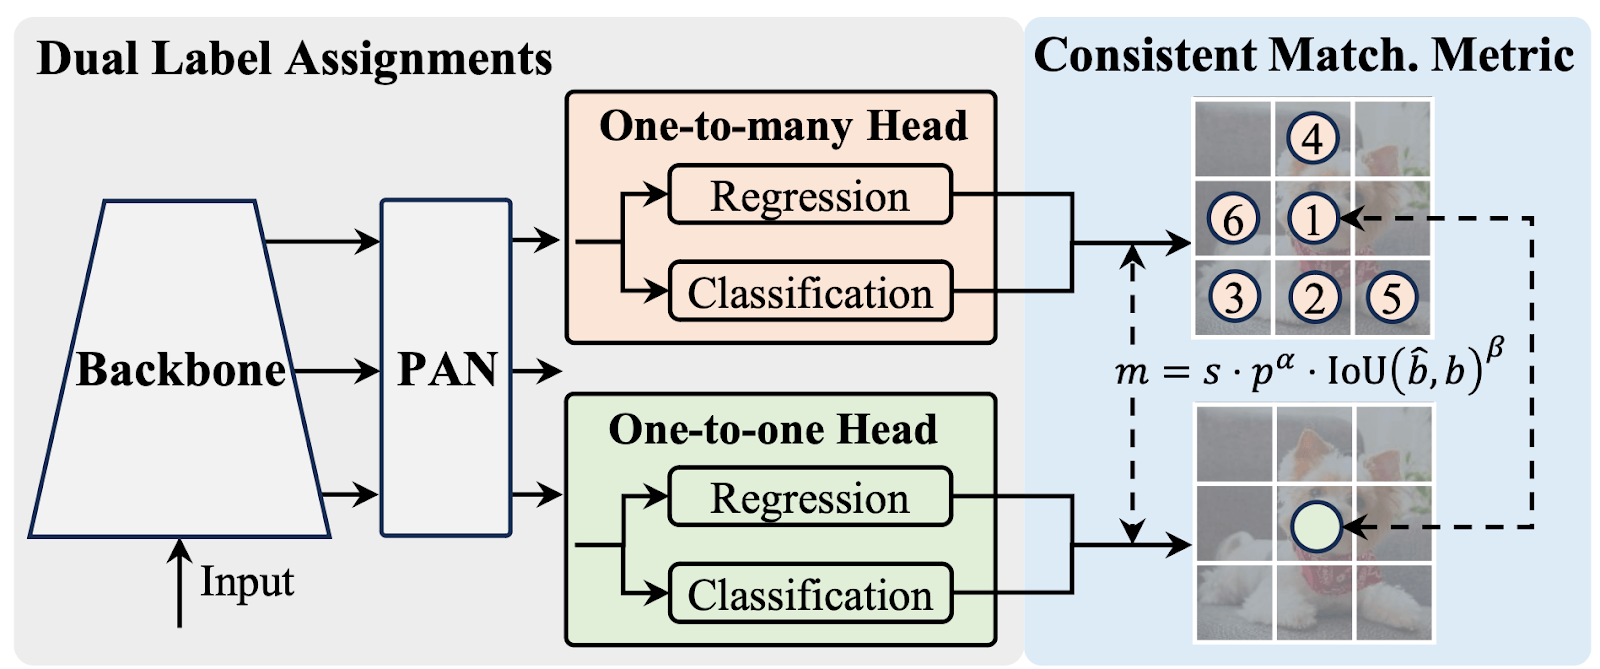

---

## Dataset
Dataset of Stop Sign Images are extracted from COCO Dataset and Google Open Image Dataset \
https://cocodataset.org/#home \
https://storage.googleapis.com/openimages/web/index.html \

---

## Complementary Materials

https://docs.ultralytics.com/models/yolov10/ \
https://github.com/THU-MIG/yolov10 \
https://blog.roboflow.com/yolov10-how-to-train/ \

---

## References
This notebook is based on https://colab.research.google.com/github/roboflow/notebooks/blob/main/notebooks/train-yolov10-object-detection-on-custom-dataset.ipynb

In [1]:
!nvidia-smi

Sat Oct  5 20:21:51 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   26C    P0    58W / 400W |      0MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Setup

In [2]:
%cd ../../yolov5/
%pwd

/work/users/jerryma/yolov5


'/work/users/jerryma/yolov5'

In [3]:
# !pip install -r requirements.txt

In [4]:
# !mkdir -p weights
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
# !ls -lh weights

## Custom Training

In [5]:
# !yolo task=detect mode=train epochs=10 batch=32 plots=True \
# model=weights/yolov10n.pt \
# data=/content/stop-sign-detection-demo/stop_sign_dataset/dataset.yaml

!python train.py --img 640 --batch 16 --epochs 50 --data ../handicap_vehicle_detection/data/new_custom_dataset/data.yaml --weights yolov5s.pt --name 5s

train: weights=yolov5s.pt, cfg=, data=../handicap_vehicle_detection/data/new_custom_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-371-g6629839d Python-3.8.20 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81052MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.

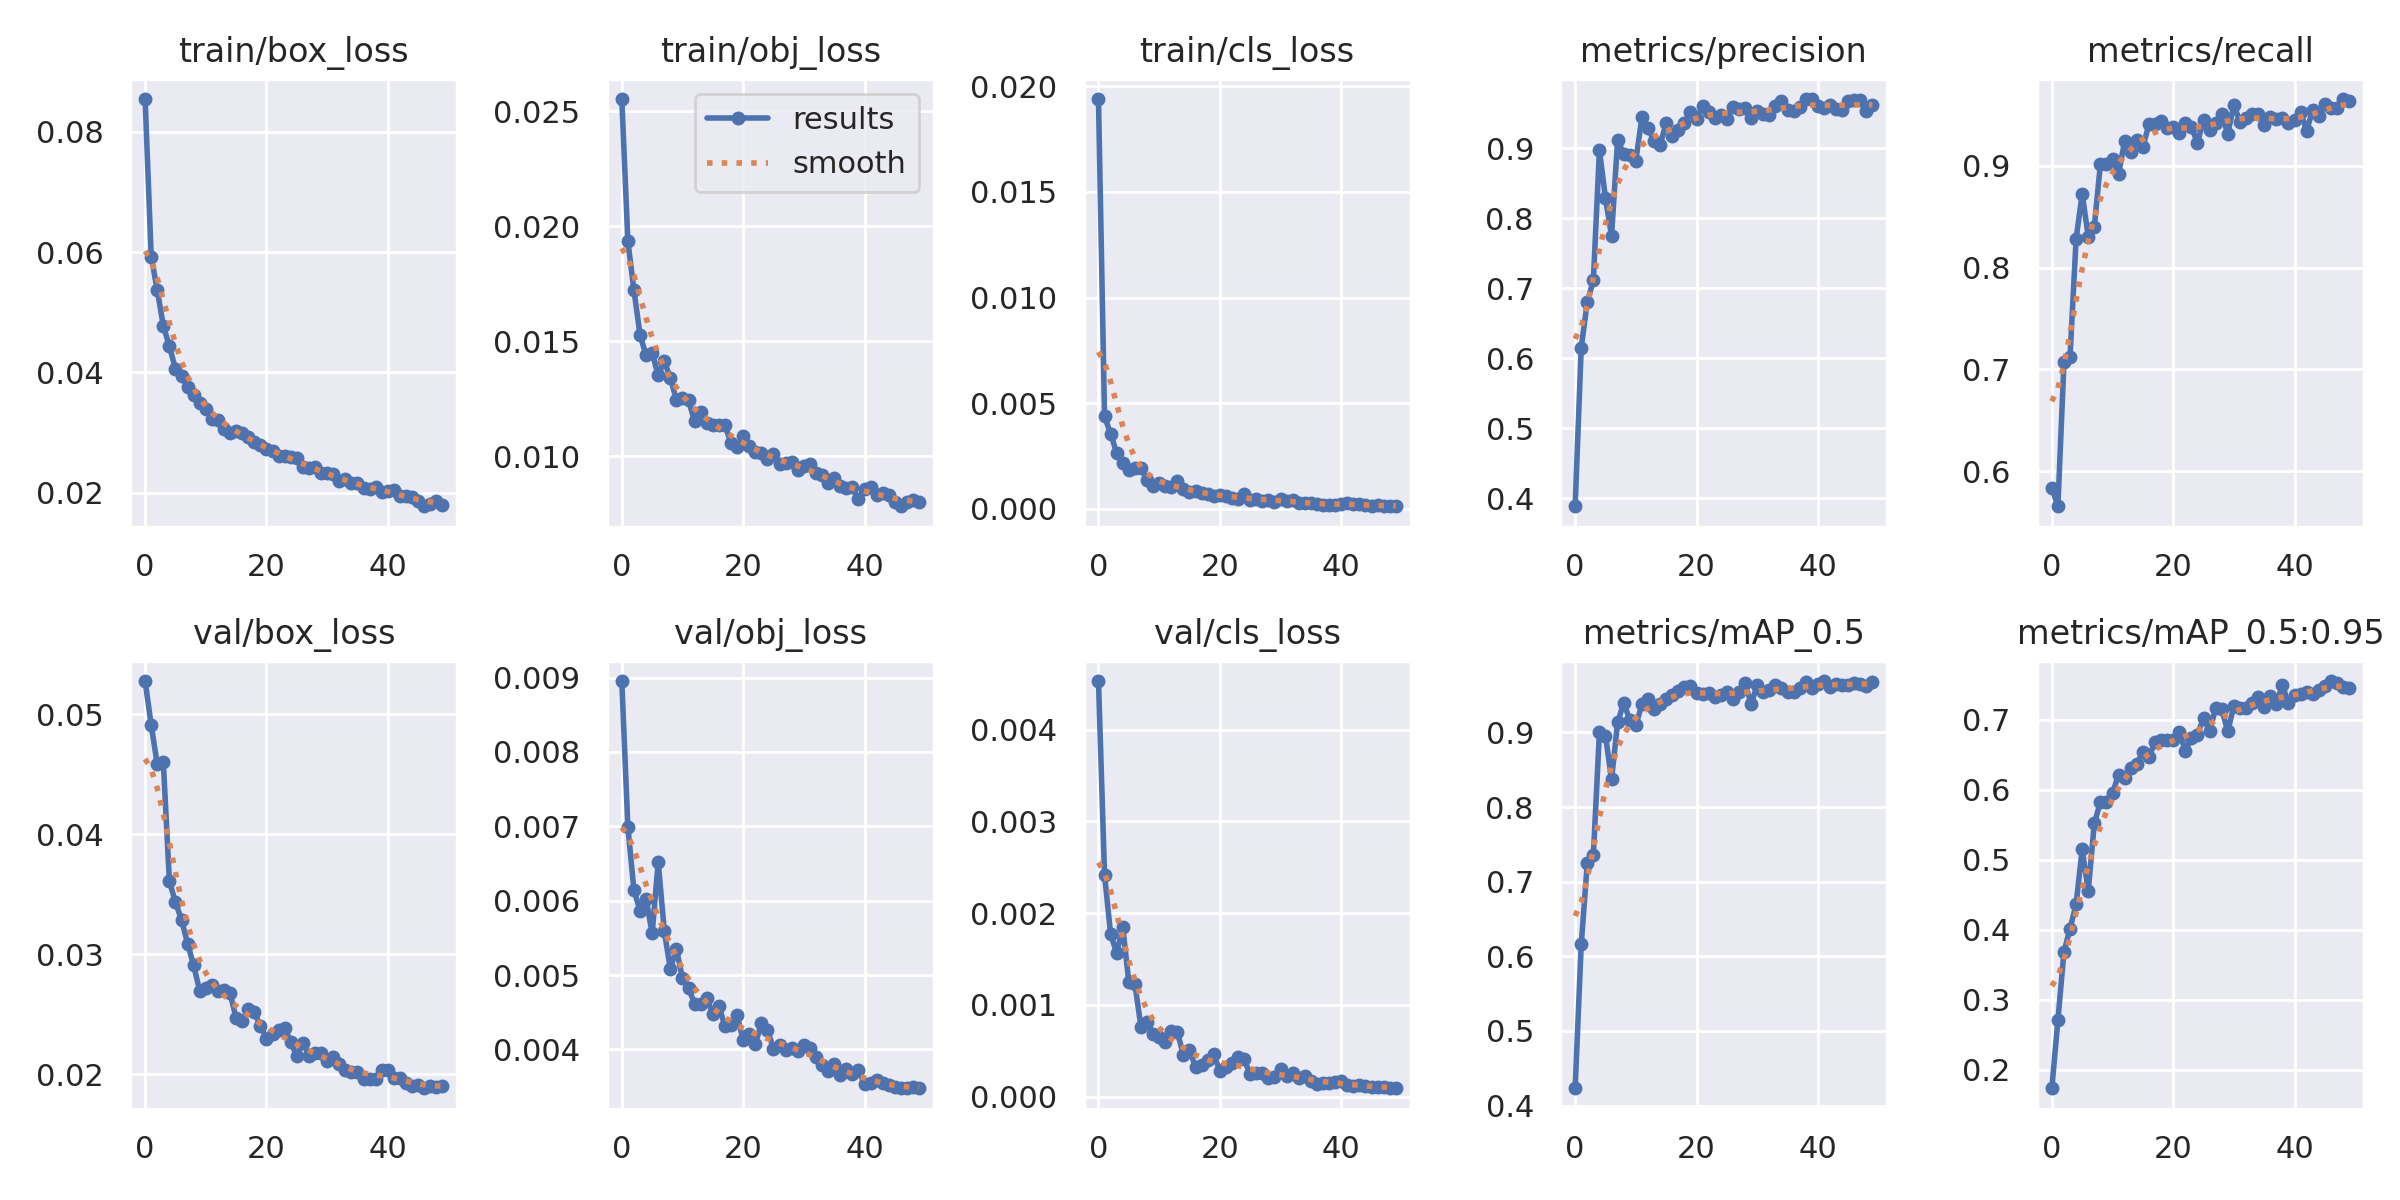

In [11]:
from IPython.display import Image
Image(filename=f'runs/train/5s4/results.png', width=600)

## Inference with Custom Model

In [14]:
# from ultralytics import YOLOv10
# import cv2
# import supervision as sv

# model = YOLOv10(f'runs/detect/train/weights/best.pt')

# dataset = sv.DetectionDataset.from_yolo(
#     images_directory_path=f"stop_sign_dataset/valid/images",
#     annotations_directory_path=f"stop_sign_dataset/valid/labels",
#     data_yaml_path=f"stop_sign_dataset/dataset.yaml"
# )

# bounding_box_annotator = sv.BoundingBoxAnnotator()
# label_annotator = sv.LabelAnnotator()

!python val.py --data ../handicap_vehicle_detection/data/new_custom_dataset/data.yaml --weights ft_models/both_5s.pt --img 640 --batch 16 --name both_5s

val: data=../handicap_vehicle_detection/data/new_custom_dataset/data.yaml, weights=['ft_models/both_5s.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=both_5s, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-371-g6629839d Python-3.8.20 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81052MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /work/users/jerryma/handicap_vehicle_detection/data/new_custom_dat
                 Class     Images  Instances          P          R      mAP50   
                   all        307        374      0.968      0.957      0.968      0.757
      symbol_of_access        307        116      0.946      0.914      0.941      0.627
                   car        307        258       0.99          1      0.9

In [15]:
!python val.py --data ../handicap_vehicle_detection/data/new_custom_dataset/data.yaml --weights ft_models/both_5s.pt --img 640 --batch 16 --name both_5s --task test

val: data=../handicap_vehicle_detection/data/new_custom_dataset/data.yaml, weights=['ft_models/both_5s.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=both_5s, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-371-g6629839d Python-3.8.20 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81052MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /work/users/jerryma/handicap_vehicle_detection/data/new_custom_da
                 Class     Images  Instances          P          R      mAP50   
                   all        319        391      0.947      0.974      0.973      0.796
      symbol_of_access        319        286      0.913      0.958      0.952      0.707
                   car        319        105      0.981       0.99      0.

In [16]:
!python detect.py --source ../handicap_vehicle_detection/data/new_custom_dataset/test/images --weights ./ft_models/both_5s.pt

detect: weights=['./ft_models/both_5s.pt'], source=../handicap_vehicle_detection/data/new_custom_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.8.20 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81052MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/319 /work/users/jerryma/handicap_vehicle_detection/data/new_custom_dataset/test/images/-046E9840-F025-4749-B3AB-19402B34E739-png_jpg.rf.06c883b17a712e575bcb8723294e53f0.jpg: 640x640 1 car, 5.8ms
image 2/319 /work/users/jerryma/handicap_vehicle_detection/data/ne

In [23]:
!python detect.py --source /users/jerryma/attachment-Handicap-parking-sign-2.png --weights ./ft_models/both_5s.pt --conf-thres 0.01 --iou-thres 0.01 --classes 0 1 --agnostic-nms True --augment True --visualize True

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-format SAVE_FORMAT] [--save-csv]
                 [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: True True True
